In [ ]:
pip install opencv-python-headless pillow matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 37.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


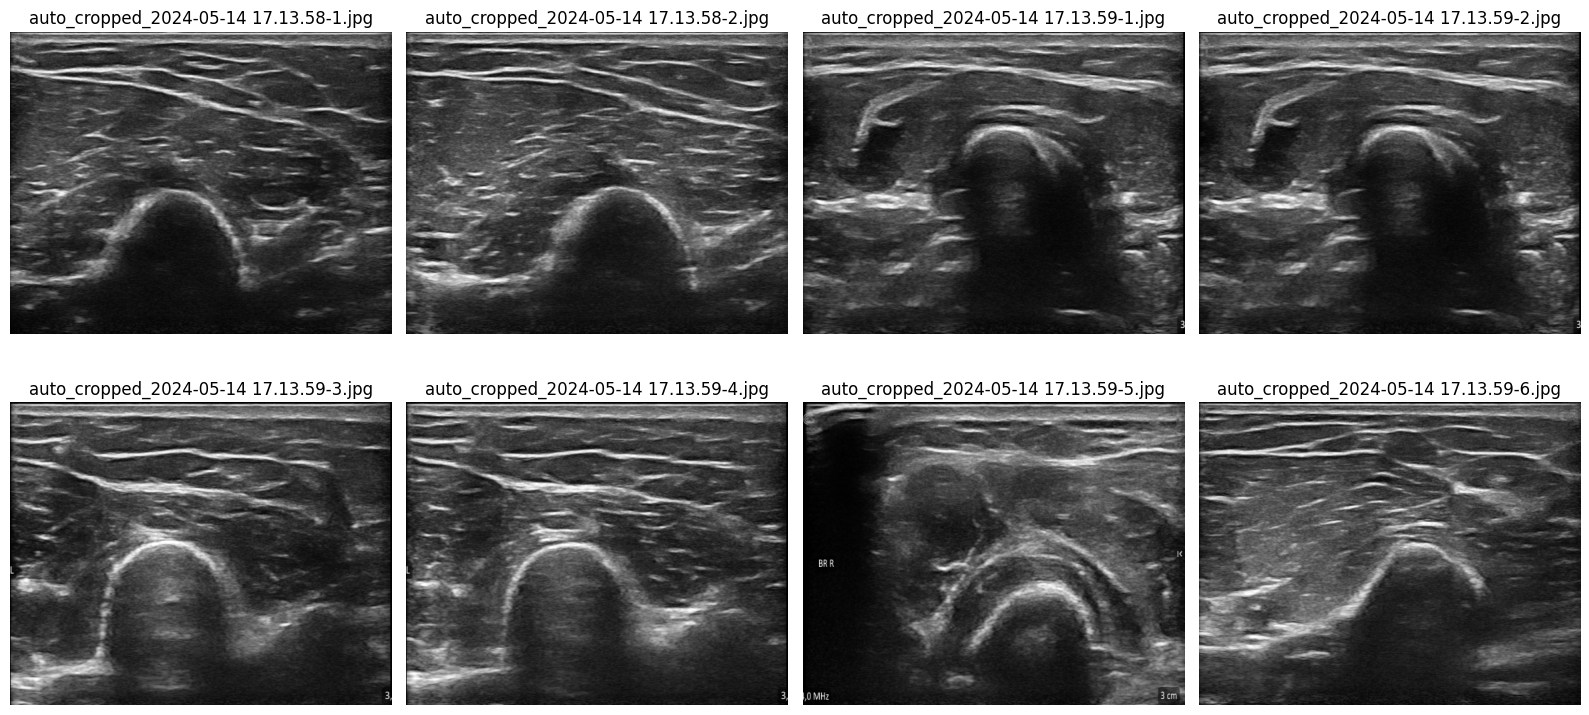

/work/Ultraschall_Armen/geschneidete Bilder/auto_cropped_2024-05-14 17.13.58-1.jpg
/work/Ultraschall_Armen/geschneidete Bilder/auto_cropped_2024-05-14 17.13.58-2.jpg
/work/Ultraschall_Armen/geschneidete Bilder/auto_cropped_2024-05-14 17.13.59-1.jpg
/work/Ultraschall_Armen/geschneidete Bilder/auto_cropped_2024-05-14 17.13.59-2.jpg
/work/Ultraschall_Armen/geschneidete Bilder/auto_cropped_2024-05-14 17.13.59-3.jpg
/work/Ultraschall_Armen/geschneidete Bilder/auto_cropped_2024-05-14 17.13.59-4.jpg
/work/Ultraschall_Armen/geschneidete Bilder/auto_cropped_2024-05-14 17.13.59-5.jpg
/work/Ultraschall_Armen/geschneidete Bilder/auto_cropped_2024-05-14 17.13.59-6.jpg
/work/Ultraschall_Armen/geschneidete Bilder/auto_cropped_2024-05-14 17.13.59-7.jpg
/work/Ultraschall_Armen/geschneidete Bilder/auto_cropped_2024-05-14 17.13.59-8.jpg
/work/Ultraschall_Armen/geschneidete Bilder/auto_cropped_2024-05-14 17.13.59.jpg
/work/Ultraschall_Armen/geschneidete Bilder/auto_cropped_2024-05-14 17.14.00-1.jpg
/work/

In [ ]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

# ***Define the folder path***
folder_path = '/work/Ultraschall_Armen/'

# ***Check  if the folder can  be read***
if not os.path.exists(folder_path):
    raise FileNotFoundError(f"The directory {folder_path} does not exist")

# ***Load all the photos in the folder***
file_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

# detect the content area  and cut the frame
def auto_crop(image):
    # Image type is Grayscale image
    gray = image
    # Binarizate the images
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    # detect the threshold
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Find the biggest frame and cut it.
        max_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(max_contour)
        cropped_image = image[y:y+h, x:x+w]
        return cropped_image
    return image

# Set a image as the standard size
reference_image_path = '/work/Ultraschall_Armen/2024-05-14 17.13.58.jpg'
reference_image = cv2.imread(reference_image_path, cv2.IMREAD_GRAYSCALE)
reference_cropped = auto_crop(reference_image)
target_height, target_width = reference_cropped.shape

# Save all the cropped images in a new folder
output_folder_path = os.path.join(folder_path, 'geschneidete Bilder')
os.makedirs(output_folder_path, exist_ok=True)

# Shape all the images to the standard size
cropped_images_auto = []
output_paths_auto = []
for file_path in file_paths:
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # read all the gray scale image
    cropped_img = auto_crop(img)
    resized_img = cv2.resize(cropped_img, (target_width, target_height))  # Resize
    output_filename = 'auto_cropped_' + os.path.basename(file_path)
    output_path = os.path.join(output_folder_path, output_filename)
    cv2.imwrite(output_path, resized_img)
    cropped_images_auto.append(resized_img)
    output_paths_auto.append(output_path)

# Show the cropped images to verify that the images have been cropped.
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for ax, img, path in zip(axes.flatten(), cropped_images_auto, output_paths_auto):
    ax.imshow(img, cmap='gray')
    ax.set_title(os.path.basename(path))
    ax.axis('off')
plt.tight_layout()
plt.show()

for path in output_paths_auto:
    print(path)


# Check if all the images are the same size now

In [ ]:
import cv2
import os

# ***Define the folder path***
folder_path = '/work/Ultraschall_Armen/geschneidete Bilder/'

# ***Check  if the folder can  be read***
if not os.path.exists(folder_path):
    raise FileNotFoundError(f"The directory {folder_path} does not exist")

# ***Load all the photos in the folder***
file_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

# Check their size
def check_image_sizes(file_paths):
    sizes = []
    for file_path in file_paths:
        image = cv2.imread(file_path)
        size = image.shape
        sizes.append(size)
        print(f"Image: {os.path.basename(file_path)}, Size: {size}")

    # Check if all sizes are the same
    if all(s == sizes[0] for s in sizes):
        print("All images are the same size.")
    else:
        print("Not all images are the same size.")
    
    return sizes

# Run the check
sizes = check_image_sizes(file_paths)



Image: auto_cropped_2024-05-14 17.13.58-1.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.13.58-2.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.13.58.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.13.59-1.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.13.59-2.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.13.59-3.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.13.59-4.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.13.59-5.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.13.59-6.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.13.59-7.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.13.59-8.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.13.59.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.14.00-1.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.14.00-10.jpg, Size: (454, 572, 3)
Image: auto_cropped_2024-05-14 17.14.00-2.jpg, Size: (454, 572, 3

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c653169c-5500-4533-bb41-bc6c969106aa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>